# Price Prediction with PCA and EDA (Iris Dataset)
**Principal Component Analysis (PCA)** reduces high-dimensional data to fewer components while preserving most variance. This is useful when:
- Features are correlated
- We want to visualize high-dimensional data
- Reducing computation time for models

**Exploratory Data Analysis (EDA)** helps understand data patterns through summary statistics and visualizations. We compare model performance with and without PCA to see if dimensionality reduction maintains predictive accuracy.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nStatistical summary:")
print(df.describe())

Dataset shape: (150, 5)

First few rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Statistical summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   


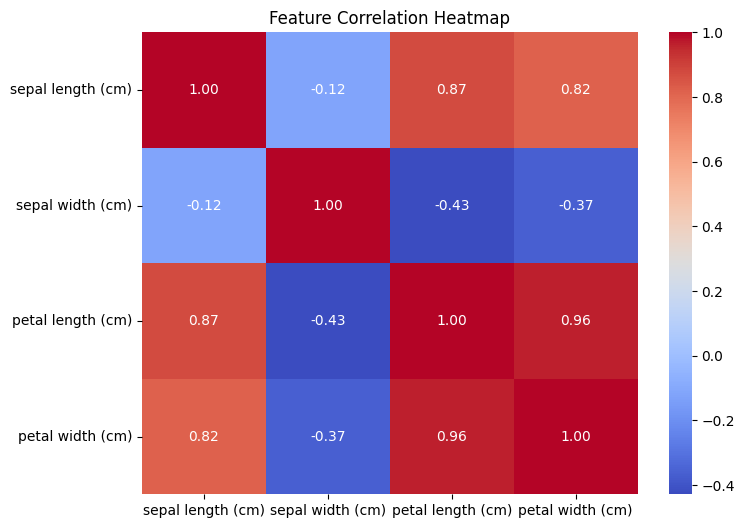

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()



In [11]:
# Prepare data (predict sepal length from other features)
X = df.drop(['sepal length (cm)', 'target'], axis=1)
y = df['sepal length (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Model WITHOUT PCA
model_no_pca = LinearRegression()
model_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = model_no_pca.predict(X_test_scaled)

mse_no_pca = mean_squared_error(y_test, y_pred_no_pca)
r2_no_pca = r2_score(y_test, y_pred_no_pca)

print("=== Model WITHOUT PCA ===")
print(f"MSE: {mse_no_pca:.4f}")
print(f"R² Score: {r2_no_pca:.4f}")

=== Model WITHOUT PCA ===
MSE: 0.0981
R² Score: 0.8526


In [13]:
# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")

# Model WITH PCA
model_with_pca = LinearRegression()
model_with_pca.fit(X_train_pca, y_train)
y_pred_pca = model_with_pca.predict(X_test_pca)

mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print("\n=== Model WITH PCA ===")
print(f"MSE: {mse_pca:.4f}")
print(f"R² Score: {r2_pca:.4f}")

Explained variance ratio: [0.70739097 0.2795238 ]
Total variance explained: 0.9869

=== Model WITH PCA ===
MSE: 0.1076
R² Score: 0.8383


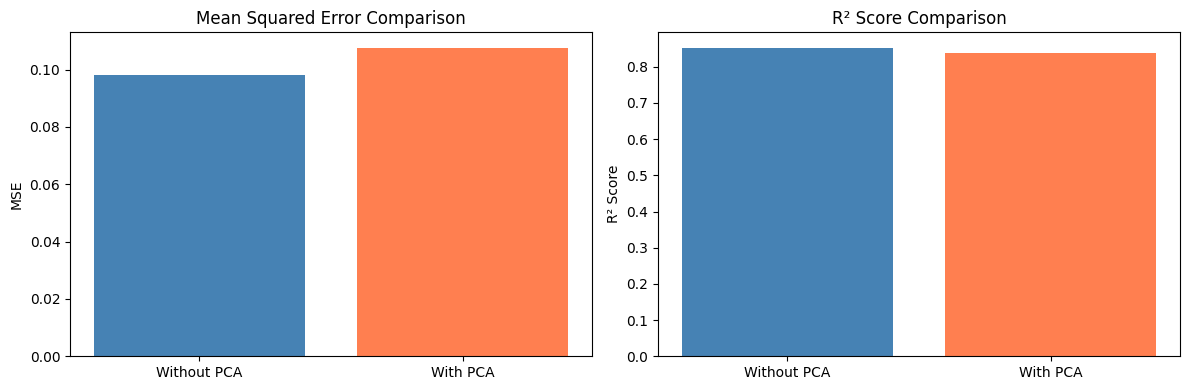


=== Summary ===
         Model       MSE        R²
0  Without PCA  0.098117  0.852584
1     With PCA  0.107648  0.838265


In [14]:
# Comparison visualization
comparison_df = pd.DataFrame({
    'Model': ['Without PCA', 'With PCA'],
    'MSE': [mse_no_pca, mse_pca],
    'R²': [r2_no_pca, r2_pca]
})

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(comparison_df['Model'], comparison_df['MSE'], color=['steelblue', 'coral'])
axes[0].set_title('Mean Squared Error Comparison')
axes[0].set_ylabel('MSE')

axes[1].bar(comparison_df['Model'], comparison_df['R²'], color=['steelblue', 'coral'])
axes[1].set_title('R² Score Comparison')
axes[1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()

print("\n=== Summary ===")
print(comparison_df)